In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Viewing DataSet
#### Check what are dependent and indepndent columns

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(7043, 21)

In [7]:
# No Duplicates Found

df.info()
### Gives the inforamtion on data set.

#### 1. How many columns are present.
#### 2. What are the different datatypes that are present in different columns[Numerical or Categorical]
#### 3. Check the number of entries present (this many rows are present in the dataset).
#### 4. If there are any null values present in the data set.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### By ckecking the information I analysed a few points:
1. Churn is the target variable while all others are the predictors.<br>
2. Out of 21 columns 3 are Numerical and 18 are object type.<br>
3. There are no missing values in any columns.<br>
4. All object type columns are <b>categorical Nominal<b> data

# Data Preprocessing

#### Checking unique value counts for all original object columns

In [9]:
df_cat = df.drop(['SeniorCitizen','tenure','MonthlyCharges'], axis=1)

In [10]:
for col in df_cat:
    print(col.upper(),":",df[col].nunique())
    print(df[col].value_counts().sort_values(ascending=False))
    print('\n')

CUSTOMERID : 7043
customerID
7590-VHVEG    1
0280-XJGEX    1
7795-CFOCW    1
9237-HQITU    1
9305-CDSKC    1
             ..
2234-XADUH    1
4801-JZAZL    1
8361-LTMKD    1
1122-JWTJW    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


GENDER : 2
gender
Male      3555
Female    3488
Name: count, dtype: int64


PARTNER : 2
Partner
No     3641
Yes    3402
Name: count, dtype: int64


DEPENDENTS : 2
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


PHONESERVICE : 2
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MULTIPLELINES : 3
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


INTERNETSERVICE : 3
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


ONLINESECURITY : 3
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


ONLINEBACKUP : 3
OnlineBackup
No        

<B>CUSTOMERID</b> has more unique values i.e, 7043. So we are going to drop Name column

In [11]:
df.drop('customerID',axis=1,inplace=True)

#### We have some columns with values as "No Internet Service" and "No Phone Service". These can be classified directly as No.

In [12]:
df.MultipleLines.value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [13]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [14]:
df.MultipleLines.value_counts()

MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

In [15]:
# repeat the same with other columns

In [16]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')

In [17]:
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')

In [18]:
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')

In [19]:
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')

In [20]:
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')

In [21]:
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No')

In [22]:
df[df['TotalCharges'] == ' '].shape

(11, 20)

#### There are 11 rows with no Total charges values. It has ' '. This makes our column type object which has to be Int. So we are dropping these 11 datapoints


In [23]:
df = df[df['TotalCharges'] != ' ']

In [24]:
df[df['TotalCharges'] == ' '].shape

(0, 20)

In [25]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

#### We dropped those null values. and converted it into Numerical

In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Checking descriptive Stats of the data
#### 1. Chechking the descriptive stats(5 pt summary i.e, min,max,25%,50%,75%)
#### 2. Comparing mean and median (to check if there are any outliers present in a column)
#### 3. If there are any categorical columns check the number of unique values present and check its top and frequency.


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


#### There might be some outliers in TotalCharges column as there is more difference in mean and median.

In [29]:
object_columns = df.select_dtypes(include=['object'])

In [30]:
object_columns.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,2,No,4065
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,2,No,5017
OnlineBackup,7032,2,No,4607
DeviceProtection,7032,2,No,4614
TechSupport,7032,2,No,4992


<Axes: >

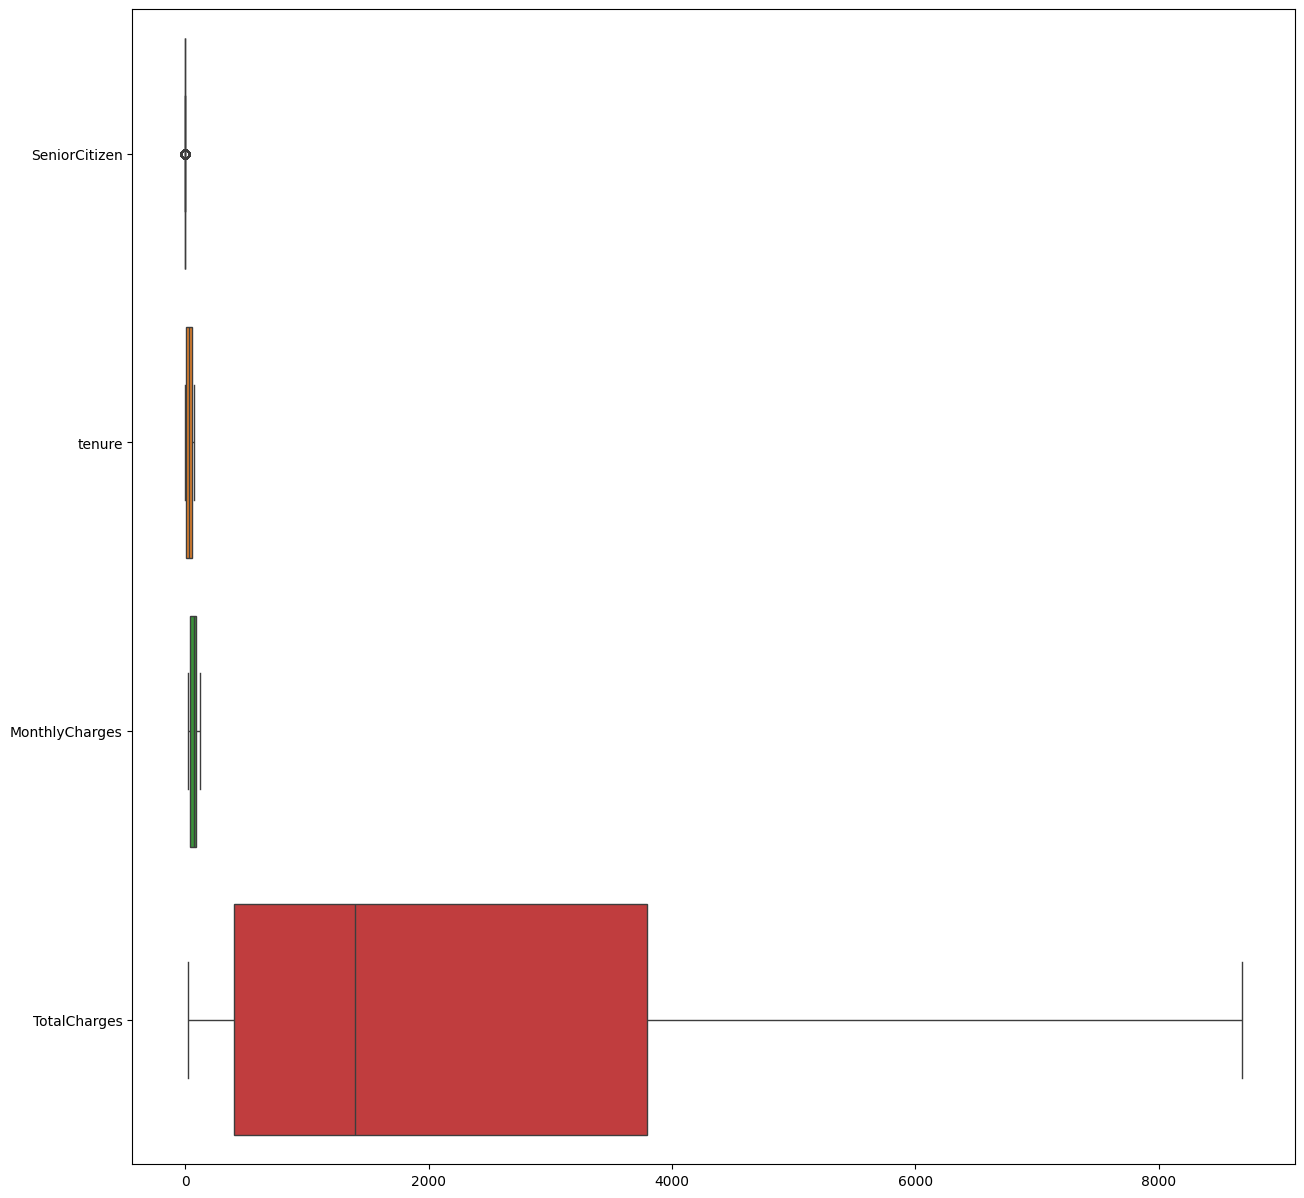

In [31]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,orient='h')

In [32]:
def outliers_per(col):
    Q1 = np.quantile(df[col],.25)
    Q3 = np.quantile(df[col],.75)
    IQR = Q3-Q1
    LL = Q1-(1.5*IQR)
    UL = Q3+(1.5*IQR)
    upper_count = df[df[col] > UL][col].count()
    upper_percentage = (upper_count/df.shape[0])*100
    lower_count = df[df[col] < LL][col].count()
    lower_percentage = (lower_count/df.shape[0])*100
    print('Outlier percentage of {col} upper range is {upper}% and lower range is {lower}%\n'.format(col=col,upper=round(upper_percentage,2),lower=round(lower_percentage,2)))
    return LL,UL

In [33]:
for i in df.select_dtypes(exclude='object').columns:
    outliers_per(i)

Outlier percentage of SeniorCitizen upper range is 16.24% and lower range is 0.0%

Outlier percentage of tenure upper range is 0.0% and lower range is 0.0%

Outlier percentage of MonthlyCharges upper range is 0.0% and lower range is 0.0%

Outlier percentage of TotalCharges upper range is 0.0% and lower range is 0.0%



#### There are no outliers present in the numerical columns.

# Data Visualisation

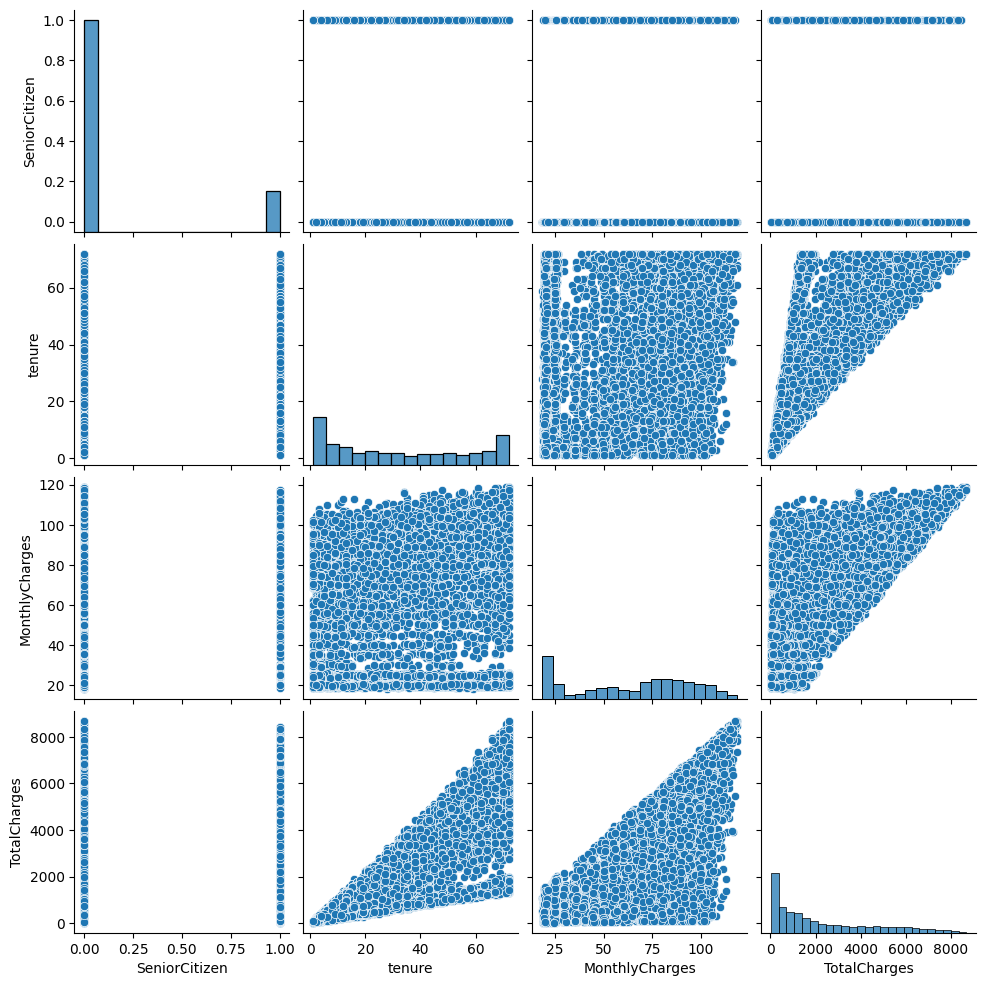

In [34]:
sns.pairplot(data=df)

In [35]:
def uni_plot(columns):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.histplot(data=df,x=columns,kde=True,bins=20)
    plt.title('Histogram of {}'.format(columns))
    plt.subplot(2,2,2)
    sns.boxplot(data=df,x=columns)
    plt.title('Boxplot of {}'.format(columns))
    plt.show()

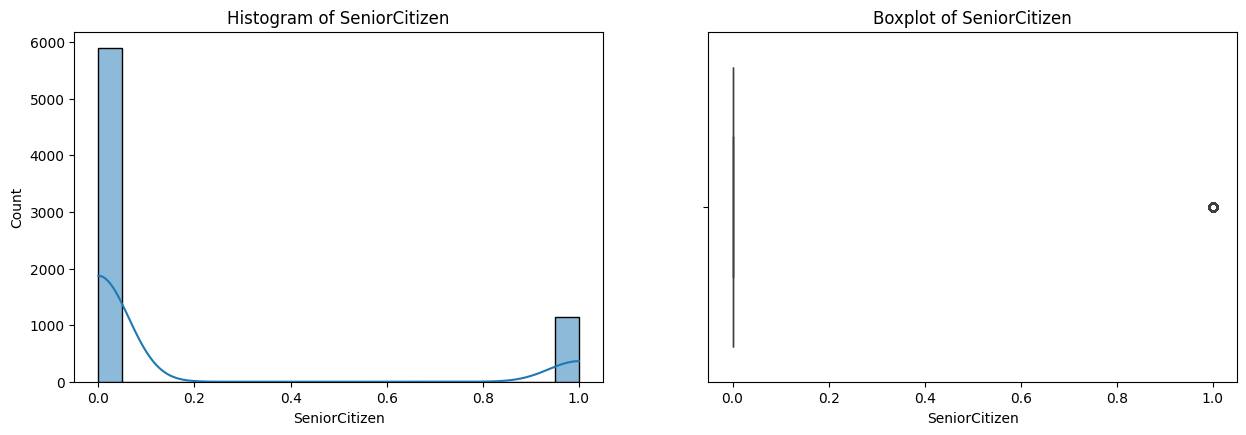

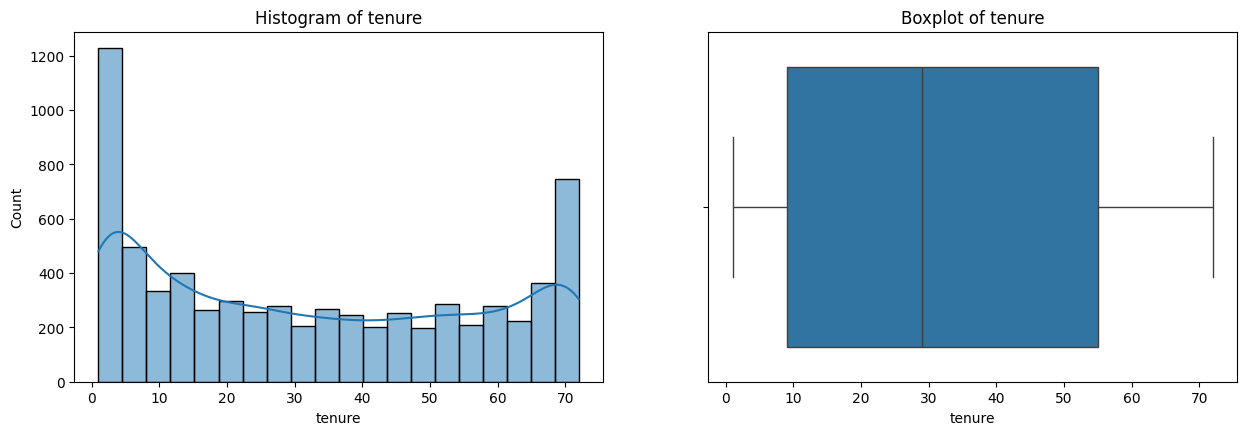

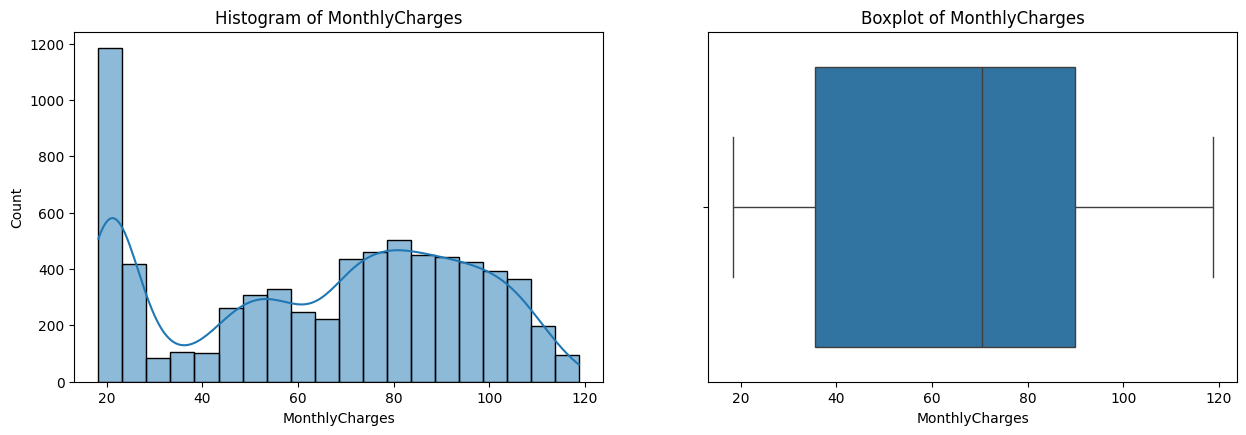

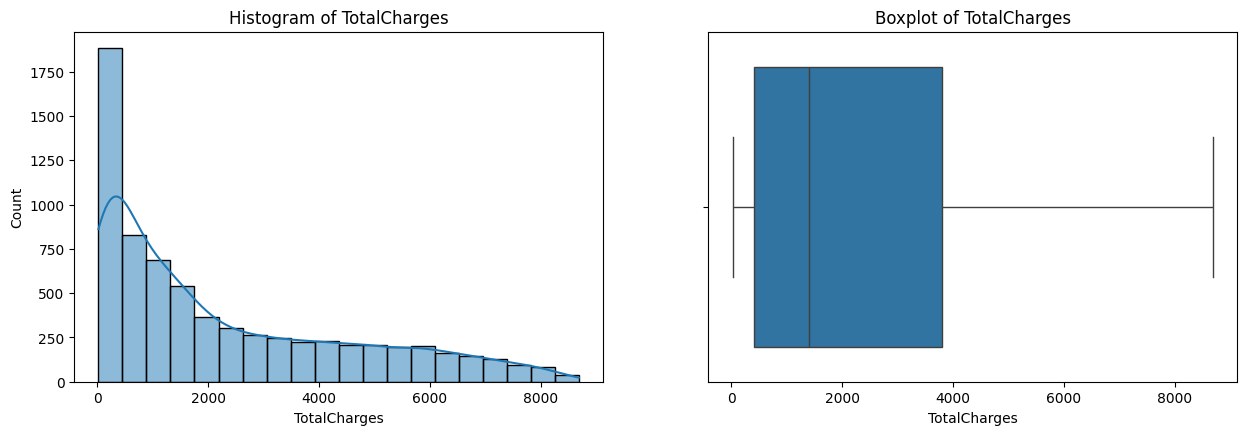

In [36]:
for i in df .select_dtypes(exclude='object'):
    uni_plot(i)

Tenure and TotalCharges are right skewed data and Monthly charges is left skewed.

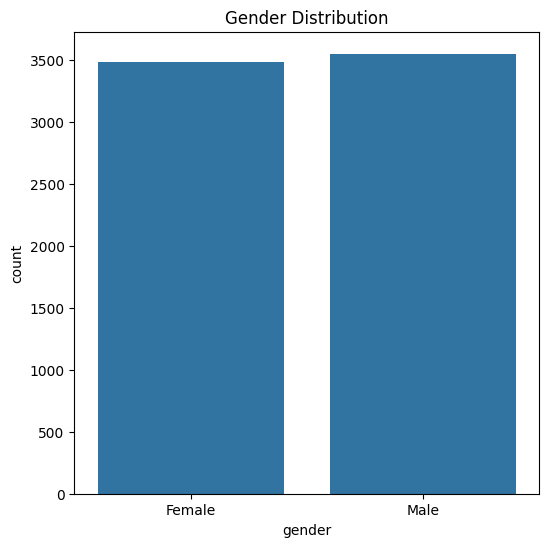

In [37]:
plt.figure(figsize=(6, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [38]:
# Almost equal gender distribution

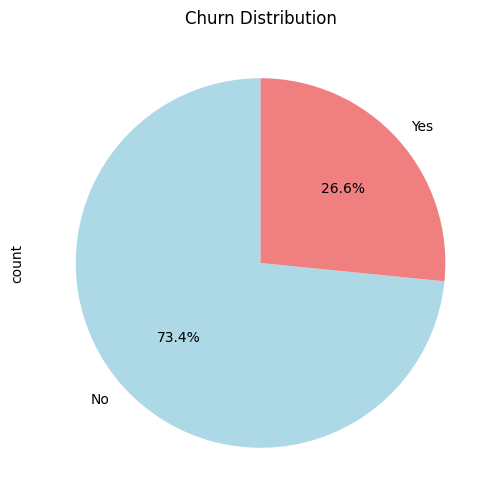

In [39]:
plt.figure(figsize=(6, 6))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Churn Distribution')
plt.show()

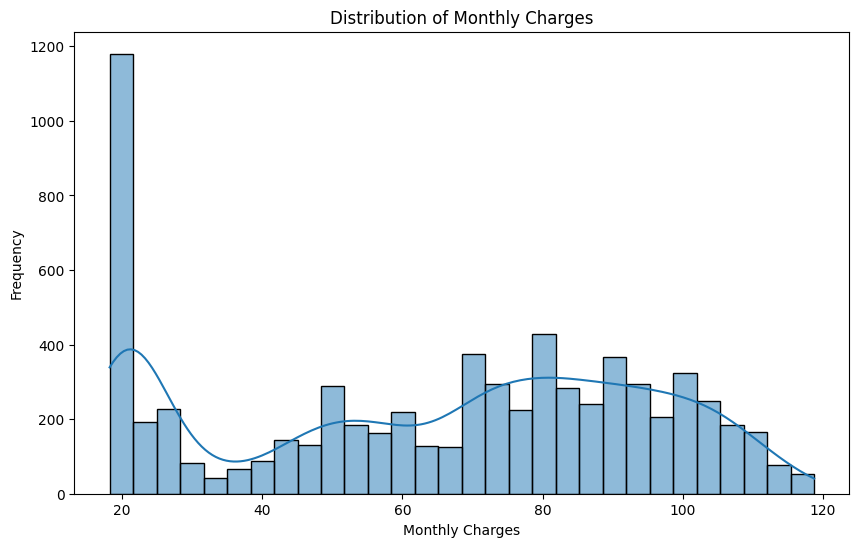

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

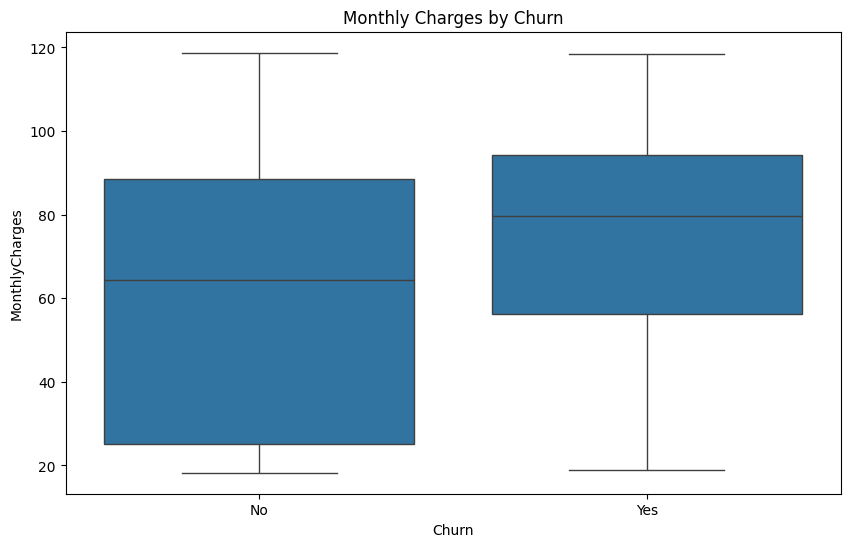

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

In [42]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])

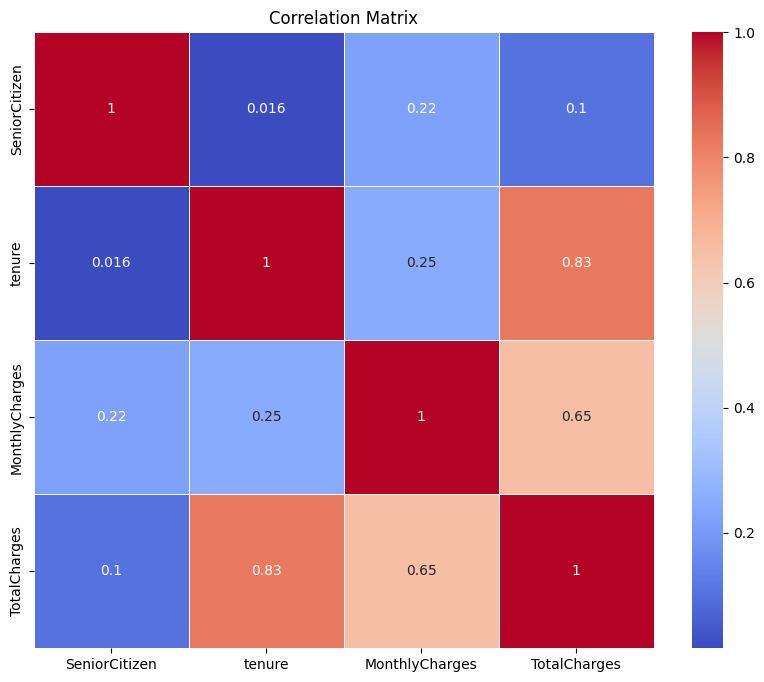

In [43]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Tenure and Total Charges are highly co related.
#### MonthlyCharges and TotalCharges are related to each other

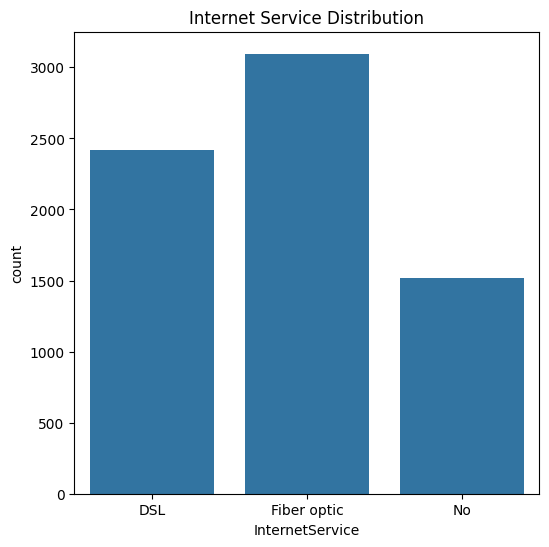

In [44]:
plt.figure(figsize=(6, 6))
sns.countplot(x='InternetService', data=df)
plt.title('Internet Service Distribution')
plt.show()

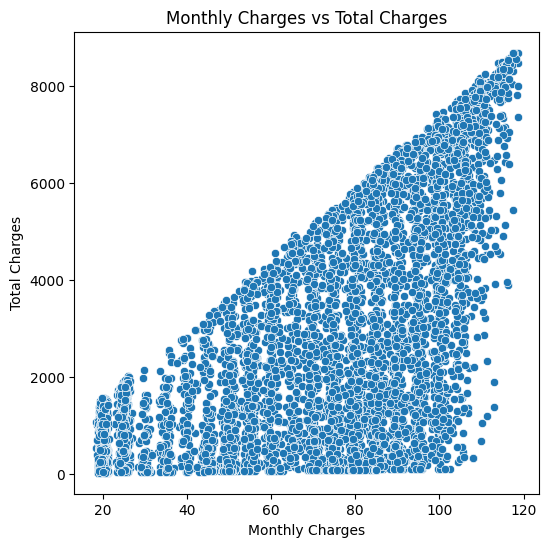

In [45]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df)
plt.title('Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

# Data preparation

### There are 11 Yes, No columns. So we do Binary Encoding for these Columns

In [46]:
yes_no_columns = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'Churn'
]


In [47]:
df[yes_no_columns] = df[yes_no_columns].replace({'Yes': 1, 'No': 0})

In [48]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [49]:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
# Replacing male with 1 and female with 0

#### We will do label encoding for Remaining columns

In [50]:
for col in df.select_dtypes(include='object'):
    df[col] = pd.Categorical(df[col]).codes

In [51]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Splitting data as test and train and defining X and y

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3946,0,0,0,0,9,0,0,0,1,0,1,1,1,1,0,0,3,58.50,539.85
3394,1,0,0,0,26,1,1,0,1,1,0,0,0,0,1,0,2,61.55,1581.95
1635,0,0,0,0,3,1,0,0,0,0,1,0,1,1,1,1,2,69.95,220.45
4088,1,0,0,0,7,1,1,1,0,0,0,0,0,0,0,0,2,73.60,520.00
1886,1,0,1,1,67,1,0,0,1,0,1,1,0,0,2,1,0,60.40,3953.70


In [56]:
y_train.head()

3946    1
3394    0
1635    0
4088    1
1886    0
Name: Churn, dtype: int64

In [57]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (4922, 19)
Shape of y_train:  (4922,)
Shape of X_test:  (2110, 19)
Shape of y_test:  (2110,)


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

# Modelling

## Building a Logistic regression model

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [60]:
lr = LogisticRegression()

In [61]:
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [62]:
ytrainPR_lr =  lr.predict(X_train_scaled)
ytrainPR_lr

array([0, 0, 0, ..., 1, 0, 1])

In [63]:
ytestPR_lr = lr.predict(X_test_scaled)
ytestPR_lr

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
accuracy_lr = accuracy_score(y_test,ytestPR_lr)
accuracy_lr

0.7990521327014218

In [65]:
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

### Metrics

Text(50.722222222222214, 0.5, 'Actual values')

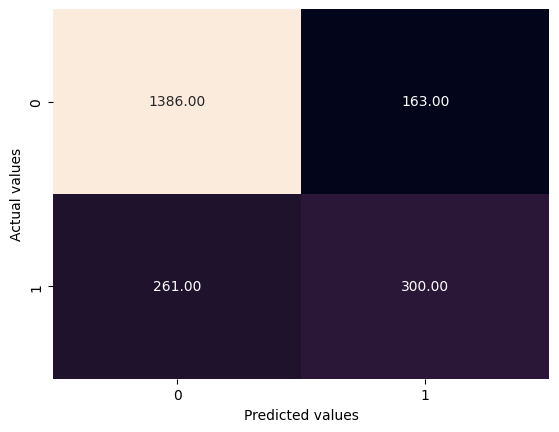

In [66]:
sns.heatmap(confusion_matrix(y_test,ytestPR_lr),annot=True,cbar=False,fmt='.2f')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [67]:
df1 = pd.DataFrame(classification_report(y_test, ytestPR_lr,output_dict=True)).T
df1

,precision,recall,f1-score,support
0,0.841530,0.894771,0.867334,1549.000000
1,0.647948,0.534759,0.585938,561.000000
accuracy,0.799052,0.799052,0.799052,0.799052
macro avg,0.744739,0.714765,0.726636,2110.000000
weighted avg,0.790061,0.799052,0.792517,2110.000000


In [68]:
lr_f1 = round(df1.loc["0"][2],2)
lr_f1

0.87

## Building a KNN model

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y_knn = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7805687203791469


Text(50.722222222222214, 0.5, 'Actual values')

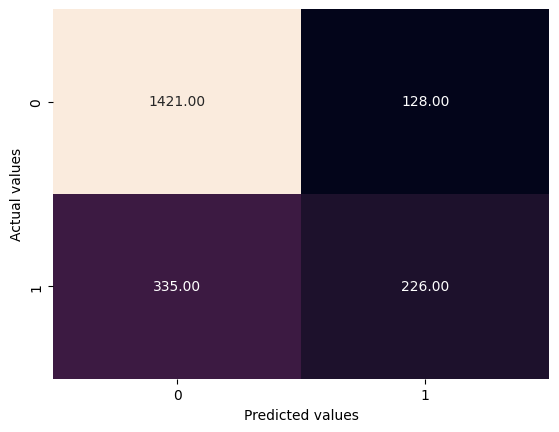

In [71]:
sns.heatmap(confusion_matrix(y_test,predicted_y_knn),annot=True,cbar=False,fmt='.2f')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [72]:
df1 = pd.DataFrame(classification_report(y_test, predicted_y_knn,output_dict=True)).T
df1

,precision,recall,f1-score,support
0,0.809226,0.917366,0.859909,1549.000000
1,0.638418,0.402852,0.493989,561.000000
accuracy,0.780569,0.780569,0.780569,0.780569
macro avg,0.723822,0.660109,0.676949,2110.000000
weighted avg,0.763812,0.780569,0.762620,2110.000000


In [73]:
knn_f1 = round(df1.loc["0"][2],2)
knn_f1

0.86

## Building a SVM model

In [74]:
from sklearn.svm import SVC

In [75]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train_scaled,y_train)
predict_y_svm = svc_model.predict(X_test_scaled)
accuracy_svc = svc_model.score(X_test_scaled,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7962085308056872


Text(50.722222222222214, 0.5, 'Actual values')

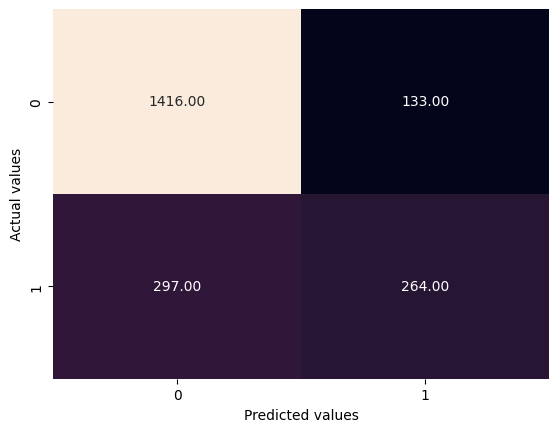

In [76]:
sns.heatmap(confusion_matrix(y_test,predict_y_svm),annot=True,cbar=False,fmt='.2f')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [77]:
df1 = pd.DataFrame(classification_report(y_test, predict_y_svm,output_dict=True)).T
df1

,precision,recall,f1-score,support
0,0.826620,0.914138,0.868179,1549.000000
1,0.664987,0.470588,0.551148,561.000000
accuracy,0.796209,0.796209,0.796209,0.796209
macro avg,0.745804,0.692363,0.709664,2110.000000
weighted avg,0.783646,0.796209,0.783888,2110.000000


In [78]:
svc_f1 = round(df1.loc["0"][2],2)
svc_f1

0.87

## Building a Descision Tree model

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [80]:
param = {
    'max_depth' : [10,12],#[3,5,7,9
    'min_samples_split' : [200],#150-450
    'min_samples_leaf' : [250,300,750]
    
}
dtcl = DecisionTreeClassifier()
grid = GridSearchCV(estimator=dtcl,param_grid=param,cv=10)#cv=3,8,10

In [81]:
grid.fit(X_train,y_train)
print(grid.best_params_)
best_grid = grid.best_estimator_
best_grid

{'max_depth': 10, 'min_samples_leaf': 250, 'min_samples_split': 200}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=250,
                       min_samples_split=200)

In [82]:
best_grid.fit(X_train,y_train)
predict_y_DT = best_grid.predict(X_test)
accuracy_DT = best_grid.score(X_test,y_test)
print("DT accuracy is :",accuracy_DT)

DT accuracy is : 0.7729857819905214


Text(50.722222222222214, 0.5, 'Actual values')

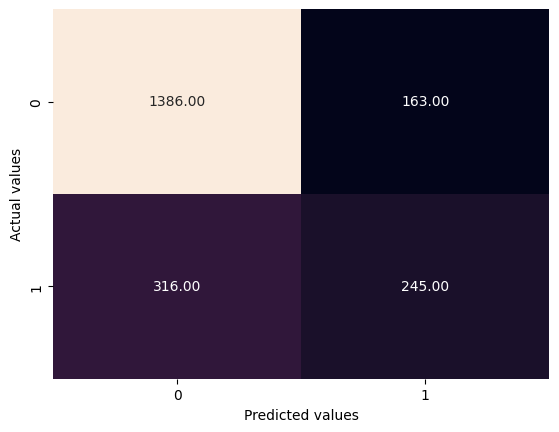

In [83]:
sns.heatmap(confusion_matrix(y_test,predict_y_DT),annot=True,cbar=False,fmt='.2f')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [84]:
df1 = pd.DataFrame(classification_report(y_test, predict_y_DT,output_dict=True)).T
df1

,precision,recall,f1-score,support
0,0.814336,0.894771,0.852661,1549.000000
1,0.600490,0.436720,0.505676,561.000000
accuracy,0.772986,0.772986,0.772986,0.772986
macro avg,0.707413,0.665745,0.679168,2110.000000
weighted avg,0.757479,0.772986,0.760406,2110.000000


In [85]:
dt_f1 = round(df1.loc["0"][2],2)
dt_f1

0.85

## Building a Random Forest model

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
param_grid = {
    'max_depth' : [10],#[3,5,7,9
    'max_features' : [5],
    'min_samples_split' : [750],#150-450
    'min_samples_leaf' : [250],
    'n_estimators' : [100]   
}
rfcl = RandomForestClassifier()
grid = GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=10)

In [88]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'max_features': [5],
                         'min_samples_leaf': [250], 'min_samples_split': [750],
                         'n_estimators': [100]})

In [89]:
grid.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 250,
 'min_samples_split': 750,
 'n_estimators': 100}

In [90]:
rf = grid.best_estimator_
rf

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=250,
                       min_samples_split=750)

In [91]:
rf.fit(X_train,y_train)
predict_y_rf = rf.predict(X_test)
accuracy_rf = rf.score(X_test,y_test)
print("RandomForest accuracy is :",accuracy_rf)

RandomForest accuracy is : 0.7786729857819905


Text(50.722222222222214, 0.5, 'Actual values')

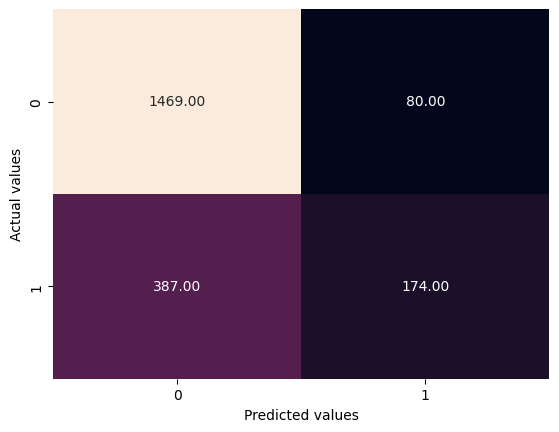

In [92]:
sns.heatmap(confusion_matrix(y_test,predict_y_rf),annot=True,cbar=False,fmt='.2f')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [93]:
df1 = pd.DataFrame(classification_report(y_test, predict_y_rf,output_dict=True)).T
df1

,precision,recall,f1-score,support
0,0.791487,0.948354,0.862849,1549.000000
1,0.685039,0.310160,0.426994,561.000000
accuracy,0.778673,0.778673,0.778673,0.778673
macro avg,0.738263,0.629257,0.644921,2110.000000
weighted avg,0.763185,0.778673,0.746965,2110.000000


In [94]:
rf_f1 = round(df1.loc["0"][2],2)
rf_f1

0.86

## Building Neural Network Classifier

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [96]:
param = {
    'hidden_layer_sizes' : [32],#[32,64,128]
    'max_iter' : [200],
    'solver' : ['adam']#sdg
}
nncl = MLPClassifier(early_stopping=True,tol=0.01)
grid = GridSearchCV(estimator=nncl,param_grid=param,cv=10)

In [97]:
grid.fit(X_train_scaled,y_train)
grid.best_params_

{'hidden_layer_sizes': 32, 'max_iter': 200, 'solver': 'adam'}

In [98]:
nn = grid.best_estimator_
nn

MLPClassifier(early_stopping=True, hidden_layer_sizes=32, tol=0.01)

In [99]:
nn.fit(X_train,y_train)
predict_y_nn = nn.predict(X_test)
accuracy_nn = nn.score(X_test,y_test)
print("MLP accuracy is :",accuracy_nn)

MLP accuracy is : 0.7819905213270142


Text(50.722222222222214, 0.5, 'Actual values')

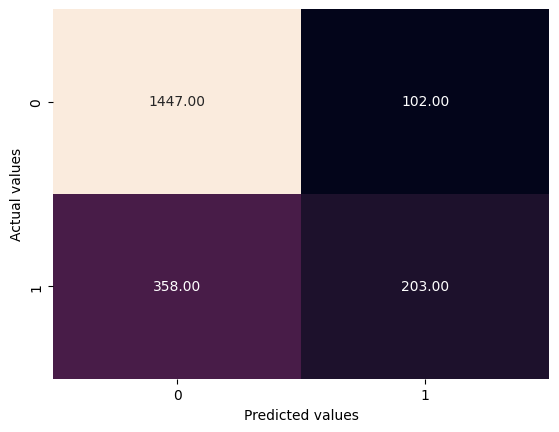

In [100]:
sns.heatmap(confusion_matrix(y_test,predict_y_nn),annot=True,cbar=False,fmt='.2f')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [101]:
df1 = pd.DataFrame(classification_report(y_test, predict_y_nn,output_dict=True)).T
df1

,precision,recall,f1-score,support
0,0.801662,0.934151,0.862850,1549.000000
1,0.665574,0.361854,0.468822,561.000000
accuracy,0.781991,0.781991,0.781991,0.781991
macro avg,0.733618,0.648002,0.665836,2110.000000
weighted avg,0.765479,0.781991,0.758087,2110.000000


In [102]:
mlp_f1 = round(df1.loc["0"][2],2)
mlp_f1

0.86

## ADA BOOST

In [103]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [104]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
accuracy_ada = metrics.accuracy_score(y_test, a_preds)
print("AdaBoost Classifier accuracy")
accuracy_ada

AdaBoost Classifier accuracy


0.7938388625592417

Text(50.722222222222214, 0.5, 'Actual values')

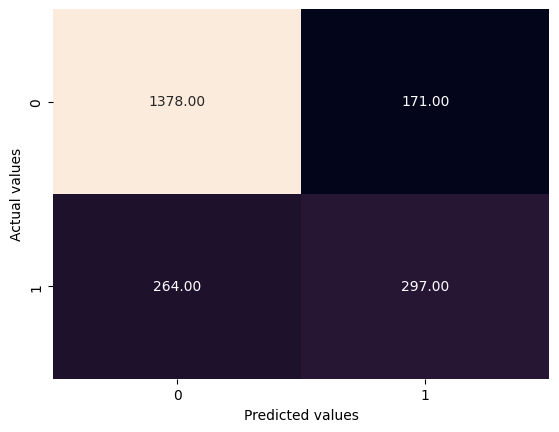

In [105]:
sns.heatmap(confusion_matrix(y_test,a_preds),annot=True,cbar=False,fmt='.2f')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [106]:
df1 = pd.DataFrame(classification_report(y_test, a_preds,output_dict=True)).T
df1

,precision,recall,f1-score,support
0,0.839220,0.889606,0.863679,1549.000000
1,0.634615,0.529412,0.577259,561.000000
accuracy,0.793839,0.793839,0.793839,0.793839
macro avg,0.736918,0.709509,0.720469,2110.000000
weighted avg,0.784821,0.793839,0.787527,2110.000000


In [107]:
ada_f1 = round(df1.loc["0"][2],2)
ada_f1

0.86

## Gradient Boost

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [109]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Classifier", accuracy_gb)

Gradient Boosting Classifier 0.7966824644549763


Text(50.722222222222214, 0.5, 'Actual values')

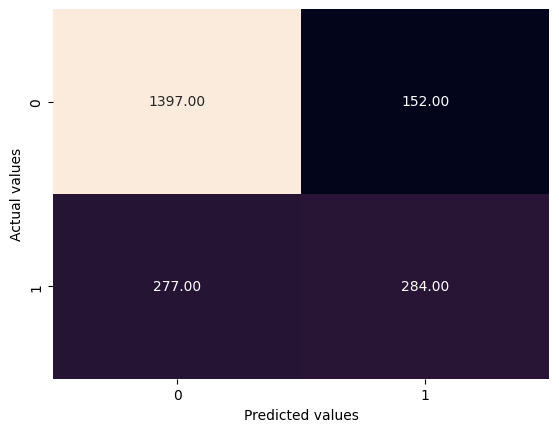

In [110]:
sns.heatmap(confusion_matrix(y_test,gb_pred),annot=True,cbar=False,fmt='.2f')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [111]:
df1 = pd.DataFrame(classification_report(y_test, gb_pred,output_dict=True)).T
df1

,precision,recall,f1-score,support
0,0.834528,0.901872,0.866894,1549.000000
1,0.651376,0.506239,0.569709,561.000000
accuracy,0.796682,0.796682,0.796682,0.796682
macro avg,0.742952,0.704056,0.718302,2110.000000
weighted avg,0.785832,0.796682,0.787880,2110.000000


In [112]:
gb_f1 = round(df1.loc["0"][2],2)
gb_f1

0.87

## Voting Classifier

In [113]:
from sklearn.ensemble import VotingClassifier

In [114]:
clasf1 = GradientBoostingClassifier()
clasf2 = LogisticRegression()
clasf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clasf1), ('lr', clasf2), ('abc', clasf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
accuracy_voting = accuracy_score(y_test, predictions)
print("Final Accuracy Score ")
print(accuracy_voting)

Final Accuracy Score 
0.7976303317535545


Text(50.722222222222214, 0.5, 'Actual values')

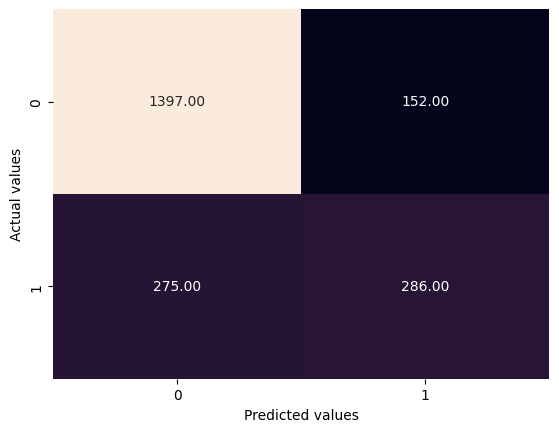

In [115]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cbar=False,fmt='.2f')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [116]:
df1 = pd.DataFrame(classification_report(y_test, predictions,output_dict=True)).T
df1

,precision,recall,f1-score,support
0,0.835526,0.901872,0.867432,1549.00000
1,0.652968,0.509804,0.572573,561.00000
accuracy,0.797630,0.797630,0.797630,0.79763
macro avg,0.744247,0.705838,0.720003,2110.00000
weighted avg,0.786988,0.797630,0.789036,2110.00000


In [117]:
voting_f1 = round(df1.loc["0"][2],2)
voting_f1

0.87

## ANN

In [118]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [119]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [120]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [121]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
493/493 [==============================] - 0s 620us/step - loss: 4.9636 - accuracy: 0.6826 - val_loss: 1.6889 - val_accuracy: 0.5009
Epoch 2/50
493/493 [==============================] - 0s 580us/step - loss: 0.9846 - accuracy: 0.7294 - val_loss: 1.4188 - val_accuracy: 0.7711
Epoch 3/50
493/493 [==============================] - 0s 513us/step - loss: 1.0263 - accuracy: 0.7432 - val_loss: 1.2431 - val_accuracy: 0.7834
Epoch 4/50
493/493 [==============================] - 0s 473us/step - loss: 1.0921 - accuracy: 0.7509 - val_loss: 0.5097 - val_accuracy: 0.7621
Epoch 5/50
493/493 [==============================] - 0s 473us/step - loss: 1.0101 - accuracy: 0.7542 - val_loss: 0.4884 - val_accuracy: 0.7768
Epoch 6/50
493/493 [==============================] - 0s 479us/step - loss: 1.1929 - accuracy: 0.7487 - val_loss: 0.5887 - val_accuracy: 0.7910
Epoch 7/50
493/493 [==============================] - 0s 510us/step - loss: 0.8157 - accuracy: 0.7643 - val_loss: 0.9454 - val_accuracy:

In [122]:
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

66/66 [==============================] - 0s 308us/step


In [128]:
accuracy_ann = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred,)
class_report = classification_report(y_test, y_pred,output_dict=True)

In [129]:
print(f'Accuracy: {accuracy_ann}')

Accuracy: 0.7900473933649289


Text(50.722222222222214, 0.5, 'Actual values')

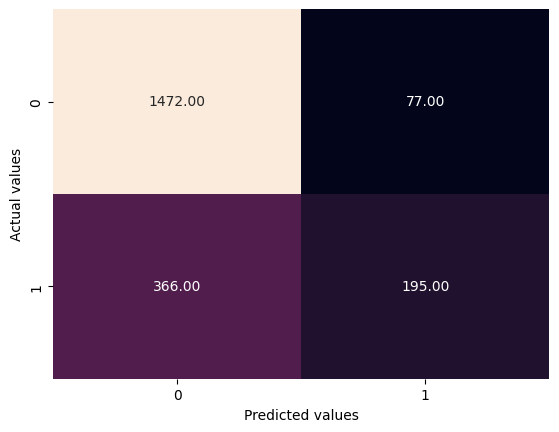

In [130]:
sns.heatmap(conf_matrix,annot=True,cbar=False,fmt='.2f')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [131]:
df1 = pd.DataFrame(class_report).T
df1

,precision,recall,f1-score,support
0,0.800871,0.950291,0.869206,1549.000000
1,0.716912,0.347594,0.468187,561.000000
accuracy,0.790047,0.790047,0.790047,0.790047
macro avg,0.758891,0.648942,0.668697,2110.000000
weighted avg,0.778548,0.790047,0.762584,2110.000000


In [132]:
ANN_f1 = round(df1.loc["0"][2],2)
ANN_f1

0.87

In [134]:
Index = ['F1score', 'AccuracyScore']
conclusion = pd.DataFrame({
    'LogisticReg': [lr_f1, accuracy_lr],
    'KNN' : [knn_f1,accuracy_knn],
    'SVM' : [svc_f1,accuracy_svc],
    'DecisionTree' : [dt_f1,accuracy_DT],
    'RandomForest':[rf_f1,accuracy_rf],
    'MLP' : [mlp_f1,accuracy_nn],
    'ADA Boost': [ada_f1, accuracy_ada],
    'GradientBoost': [gb_f1, accuracy_gb],
    'VotingClassifier': [voting_f1, accuracy_voting],
    'Artificial NN': [ANN_f1, accuracy_ann],
}, index=Index)



In [135]:
round(conclusion,2)

,LogisticReg,KNN,SVM,DecisionTree,RandomForest,MLP,ADA Boost,GradientBoost,VotingClassifier,Artificial NN
F1score,0.87,0.86,0.87,0.85,0.86,0.86,0.86,0.87,0.87,0.87
AccuracyScore,0.80,0.78,0.80,0.77,0.78,0.78,0.79,0.80,0.80,0.79
